# IntroStat Week 1 Python

Welcome to the first lecture in IntroStat

During the lectures we will present both slides and notebooks. 

This is the notebook used in the lecture in week 1. Updated: 2/2/2025


### First steps using python code

In [1]:
# Addition
2+3

5


In [2]:
# Define a variable
x = 3

In [4]:
# print out the value of the variable
print(x)

3


In [5]:
print(type(x))

<class 'int'>


In [6]:
# try changing x to 3.8 and see what happens to the type

Notice how jupyter notebooks work in two **modes**: **command** mode and **edit** mode. <br>

To enter command mode press **esc** <br>

To enter edit mode press **enter** <br>

(you can also use the mouse/clicking for most tasks)

In [7]:
# define a variable of the data-type "list", which can contain several values
x = [1,4,6,2] 

In [8]:
print(x)

[1, 4, 6, 2]


In [9]:
print(type(x))

<class 'list'>


In [10]:
# lists can contain many different types of data
x = [1,4,'hello',0.232] 
x

[1, 4, 'hello', 0.232]

In [11]:
# what happens if we multiply a list by a number?
print(x*5)

[1, 4, 'hello', 0.232, 1, 4, 'hello', 0.232, 1, 4, 'hello', 0.232, 1, 4, 'hello', 0.232, 1, 4, 'hello', 0.232]


In [12]:
# what if we had chosen a non-integer number?
print(x*1.2)

Traceback (most recent call last):
  File "c:\Users\artur\.vscode\extensions\ms-python.python-2024.22.2-win32-x64\python_files\python_server.py", line 133, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 2, in <module>
TypeError: can't multiply sequence by non-int of type 'float'



In conclusion: lists do not behave as vectors. <br>
For example multiplication does not operate elementwise. <br> 
We want to work with a variable type that behave more like a vector (or matrix).

### Using Numpy for vectors (ndarrays)

In [13]:
### import the NUMPY package for vectors (ndarray data type for multidimentional arrays), math functions, etc.
import numpy as np

In [14]:
# store data of student height in variable x (which is now an array, not a list)
x = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])

In [15]:
print(x)

[168 161 167 179 184 166 198 187 191 179]


In [16]:
print(type(x))

<class 'numpy.ndarray'>


In [17]:
# type is 'numpy.ndarray' - stands for n-dimensional array (1D = vector, 2D = matrix, etc.)

### Calculate the mean

In [18]:
# calculate mean of x (average height of students)
np.mean(x)

178.0


In [19]:
# "mean()" can also be called as a method
x.mean()

178.0


Have a look in the online documentation: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html

The datatype "ndarray" (also called a numpy array) has many methods.

In [20]:
# lets try some other "methods"
x.min()

161


In [21]:
x.max()

198


In [22]:
# what about variance? 
# OBS: need to remember ddof = 1 if you want to calculate the "sample variance". 
# We use (n-1) for sample variance because it gives us an unbiased estimator of the population variance. This is known as Bessel's correction. 
x.var(ddof=1)

149.11111111111111


ddof?? look in documentation for explanation: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html


In [23]:
# standard deviation (also remember ddof=1 for "sample standard deviation")
x.std(ddof=1)

12.211106056009468


In [24]:
# what about the median?
x.median()

Traceback (most recent call last):
  File "c:\Users\artur\.vscode\extensions\ms-python.python-2024.22.2-win32-x64\python_files\python_server.py", line 133, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 2, in <module>
AttributeError: 'numpy.ndarray' object has no attribute 'median'



no method called median? 

OK, then we call the median() function directly from numpy

In [25]:
np.median(x)

179.0


In [26]:
# we can also get other percentiles (50th percentile is the same as the median)
np.percentile(x, [10,20,50,80,90], method='averaged_inverted_cdf')

[163.5 166.5 179.  189.  194.5]


# Notice the method="averaged inverted cdf", CDF (Cumulative Distribution Function)

There are many different ways to define percentiles!

See the documentaion: https://numpy.org/doc/stable/reference/generated/numpy.percentile.html#numpy.percentile

In this course (and in the book) we use the 'averaged_inverted_cdf' method.
Here's Inverted CDF (Cumulative Distribution Function) works:

1. The function first converts the input data and requested percentiles to numpy arrays
2. It sorts the data in ascending order
3. Calculates positions using the averaged empirical CDF approach
4. Performs linear interpolation between points to get the final percentile values

In [27]:
# compare with sorted data
x.sort()
print(x)

[161 166 167 168 179 179 184 187 191 198]


## Coefficient of variation
The **Coefficient of Variation (CV)** is generally defined as the ratio of the standard deviation to the mean:

$
\text{CV} = \frac{\sigma}{\mu}
$

- $\sigma$ represents the standard deviation (of the population or sample).
- $\mu$ represents the mean (of the population or sample).

Often the CV is expressed as a percentage by multiplying by 100%:

$
\text{CV (\%)} = \left(\frac{\sigma}{\mu}\right) \times 100\%
$

In [28]:
import numpy as np

# Store student heights in an array
x = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])

# Calculate the mean and standard deviation
mean_x = np.mean(x)
std_x = np.std(x)

# Calculate the coefficient of variation
cv = (std_x / mean_x) * 100

print(f"Coefficient of Variation: {cv:.2f}%")


Coefficient of Variation: 6.51%


## Covariance and Correlation Coefficient
### 1. Sample Covariance

Let $\{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\}$ be the data pairs, and let
$
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i, 
\quad 
\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i
$
be the sample means of $x$ and $y$, respectively. Then the **sample covariance** is given by

$
\mathrm{Cov}(x, y)
= \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}).
$

---

### 2. Sample Pearson Correlation Coefficient

The **sample Pearson correlation coefficient** (often just called the correlation coefficient) is defined as:

$
r_{xy}
= \frac{\mathrm{Cov}(x, y)}{s_x \, s_y}
$

where $s_x$ and $s_y$ are the sample standard deviations of $x$ and $y$, respectively:

$
s_X 
= \sqrt{\frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2}, 
\quad
s_Y 
= \sqrt{\frac{1}{n-1} \sum_{i=1}^n (y_i - \bar{y})^2}.
$

Hence, putting it all together:

$
r_{xy}
= \frac{ \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }
       { \sqrt{\frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2} \,\sqrt{\frac{1}{n-1} \sum_{i=1}^n (y_i - \bar{y})^2} }.
$

This correlation coefficient $r_{xy}$ always lies between $-1$ and $+1$.

In [29]:
import numpy as np

# Data from the table
heights = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])
weights = np.array([65.5, 58.3, 68.1, 85.7, 80.5, 63.4, 102.6, 91.4, 86.7, 78.9])

# Covariance calculation
cov_matrix = np.cov(heights, weights)
covariance = cov_matrix[0, 1]

# Correlation coefficient calculation
correlation = np.corrcoef(heights, weights)[0, 1]

print(f"Covariance: {covariance:.2f}")
print(f"Correlation coefficient: {correlation:.2f}")


Covariance: 165.92
Correlation coefficient: 0.97


## Scatter Plot and Show the Correlation Coefficient
1. **Correlation Coefficient Calculation**  
   The code calculates the Pearson correlation coefficient between the `heights` and `weights` arrays (`np.corrcoef(heights, weights)[0,1]`). This value indicates the strength and direction of the linear relationship between height and weight. A positive value means that as height increases, weight tends to increase.
2. **Scatter Plot**  
   The code generates a scatter plot of the given height and weight data, with height on the x-axis and weight on the y-axis. Each point on the plot corresponds to one pair of (height, weight) values. This visual representation helps confirm the correlation observed numerically; if most points roughly follow a straight line sloping upward, it suggests a positive linear relationship.

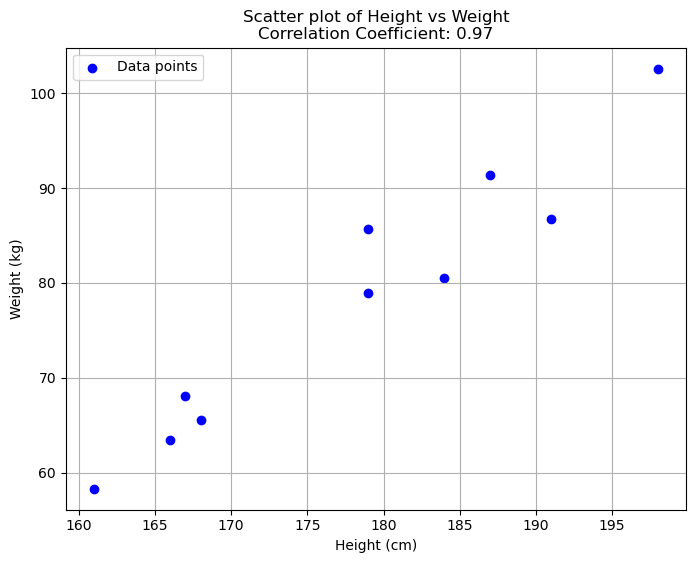

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the table
heights = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])
weights = np.array([65.5, 58.3, 68.1, 85.7, 80.5, 63.4, 102.6, 91.4, 86.7, 78.9])

# Calculate correlation coefficient
correlation = np.corrcoef(heights, weights)[0, 1]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(heights, weights, color='b', label='Data points')

# Add labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title(f'Scatter plot of Height vs Weight\nCorrelation Coefficient: {correlation:.2f}')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()


## Plots/Visual or Graphical Methods in Descriptive Statistics

In [31]:
# import the matplotlib.pyplot package 
import matplotlib.pyplot as plt

In [32]:
x = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])
print(x)

[168 161 167 179 184 166 198 187 191 179]


### Histogram

A histogram is a graphical representation of the distribution of numerical data, where the data is grouped into continuous, non-overlapping intervals called bins, and the height of each bar reflects the frequency (or density) of values falling within each bin.

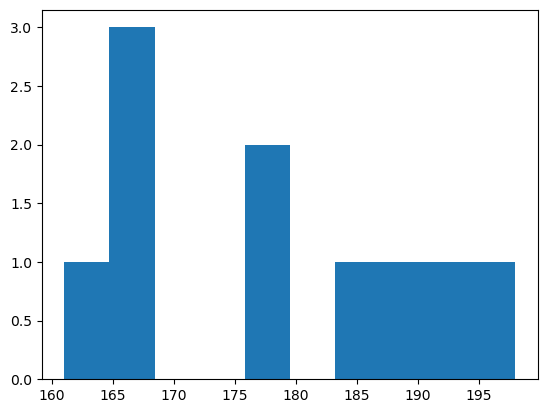

In [33]:
# Create a histogram. This is the simplest way of creating a histogram in matplotlib. It uses the default number of bins and default style settings.
plt.hist(x)
plt.show()

Now, we'll customize the histogram by specifying the number of bins (bins=8), adding an edge color and fill color, adjusting the transparency (alpha), and setting density=True to display a probability density rather than a simple count.

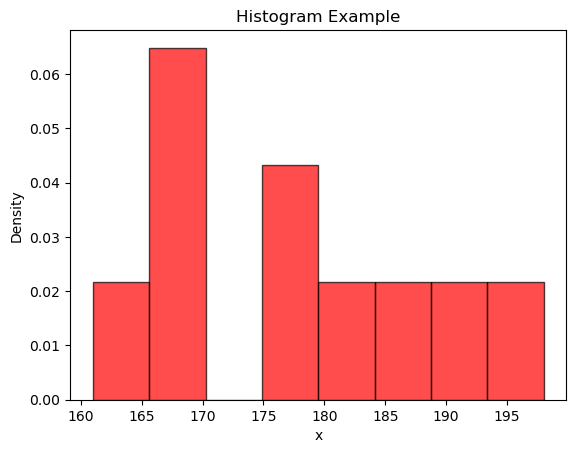

In [34]:
# Customize your histogram
plt.hist(x, bins=8, edgecolor='black', color='red', alpha=0.7, density=True)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram Example')
plt.show()

Now, we'll manually define the exact bin edges (bins=[160,165,170,175,180,185,190,195,200]) to have full control over the bin intervals, while still applying the same stylistic customizations as in the second example.

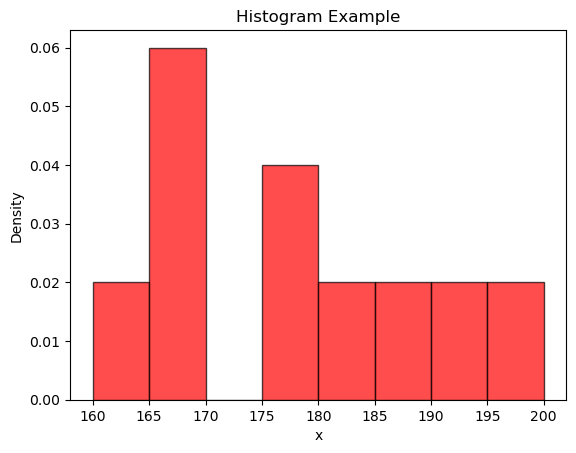

In [35]:
# specifying bin-edges:
plt.hist(x, bins=[160,165,170,175,180,185,190,195,200], edgecolor='black', color='red', alpha=0.7, density=True)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram Example')
plt.show()

Histograms are important - they show how the data is **distributed** <br>

Next week we will talk more about theoretical distributions. <br>

Histograms serve as *empirical distributions* <br>

Based on the histogram above, how would you guess the height-distribution in the *population* looks like? <br> 

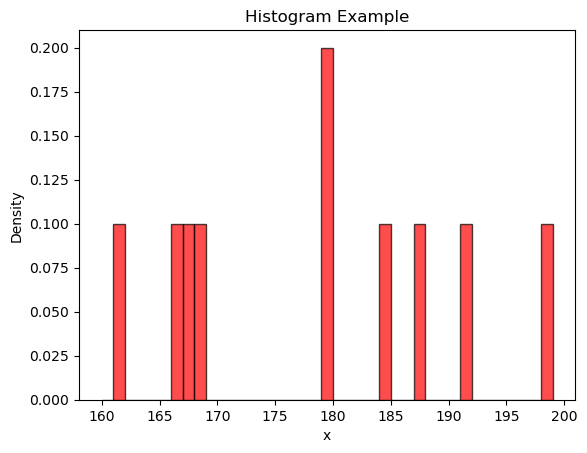

In [36]:
# lets try with really small bins, such that the histogram diplays all the details in the data:
plt.hist(x, bins=np.arange(160,200,1), edgecolor='black', color='red', alpha=0.7, density=True)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram Example')
plt.show()

### Empirical Cumulative Distribution Function

A **cumulative distribution plot (CDF plot)** shows the proportion (or percentage) of data that falls at or below a given value. Some key, simple uses include:

- **Identifying thresholds and percentiles** (e.g., medians, quartiles).  
- **Comparing different distributions** easily on the same figure.  
- **Visually estimating probabilities** of data being less than or greater than a specific value. 

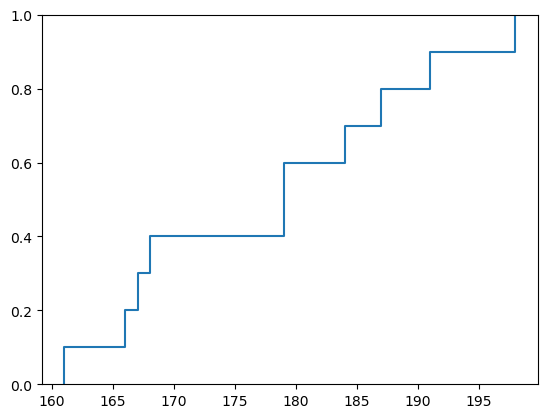

In [79]:
# plot the "Empirical Cumulative Distribution Function"
plt.ecdf(x)
plt.show()

In [80]:
# compare with values 
print(x)

[168 161 167 179 184 166 198 187 191 179]


In the cumulated distribution all detailed information is kept - but it is another way to visualise the distribution of data. 

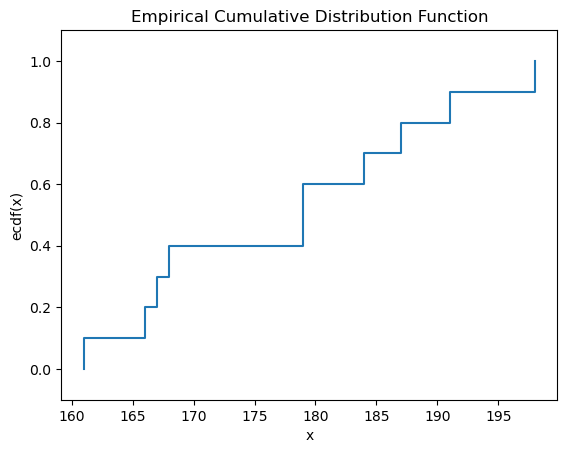

In [37]:
# lets increase the y-range slightly:
plt.ecdf(x)
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('ecdf(x)')
plt.title('Empirical Cumulative Distribution Function')
plt.show()

The y-range goes from 0 to 1 - or 0% to 100% <br>

Every vertical line-segment is a datapoint <br>

When the plot is "steep" there are many datapoints (corresponds to high values in the histogram). <br>

The ECDF plot can be used to understand the "averaged_inverted_cdf" used for percentiles. <br>

OBS: we will talk more about distributions - and cumulative distributions - over the next couple of weeks. 

### Other plots in Python: Boxplot and Pie Chart

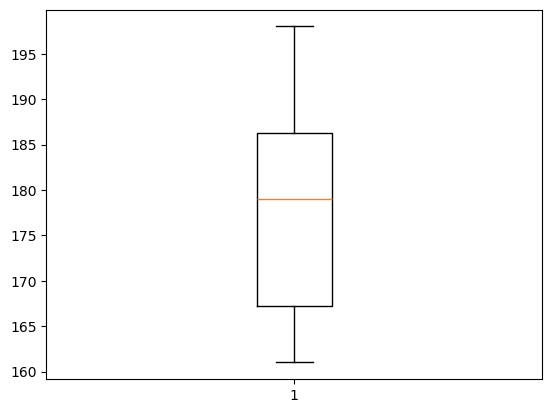

In [38]:
# make a boxplot
plt.boxplot(x)
plt.show()

A **boxplot** provides a quick visual summary of the distribution of a dataset, highlighting:

1. **Median and Quartiles** – Displays the central tendency and spread via the median, the first quartile (Q1), and the third quartile (Q3).  
2. **Range of Data** – Whiskers typically show the data range or a specific cutoff for outliers.  
3. **Outlier Detection** – Points lying beyond the whiskers indicate potential outliers.  
4. **Comparison Across Groups** – Multiple boxplots can be placed side by side to compare distributions.

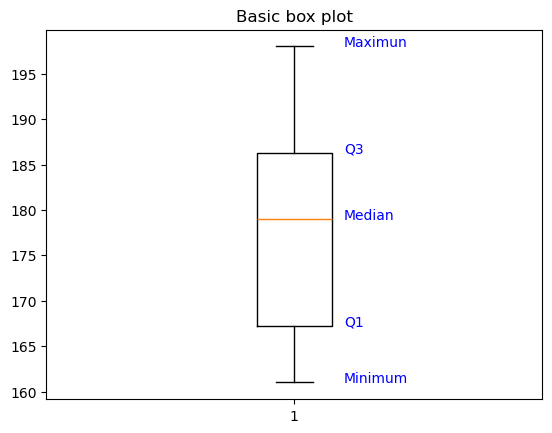

[161 166 167 168 179 179 184 187 191 198]


In [39]:
# Adding some explanation:
plt.boxplot(x)
plt.text(1.1, np.percentile(x,  [0]), 'Minimum', color='blue')
plt.text(1.1, np.percentile(x, [25]), 'Q1', color='blue')
plt.text(1.1, np.percentile(x, [50]), 'Median', color='blue')
plt.text(1.1, np.percentile(x, [75]), 'Q3', color='blue')
plt.text(1.1, np.percentile(x,[100]), 'Maximun', color='blue')
plt.title("Basic box plot")
plt.show()
x.sort()
print(x)

Manually Calculate the values required for drawing a boxplot

In [40]:
import numpy as np

# Data
x = [168, 161, 167, 179, 184, 166, 198, 187, 191, 179]

# Calculate quartiles
Q1 = np.percentile(x, 25)
Q3 = np.percentile(x, 75)

# Interquartile Range
IQR = Q3 - Q1

# Calculate fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("IQR:", IQR)
print("Lower fence:", lower_fence)
print("Upper fence:", upper_fence)


Q1 (25th percentile): 167.25
Q3 (75th percentile): 186.25
IQR: 19.0
Lower fence: 138.75
Upper fence: 214.75


See documentation for definition of box and whiskers: 

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot



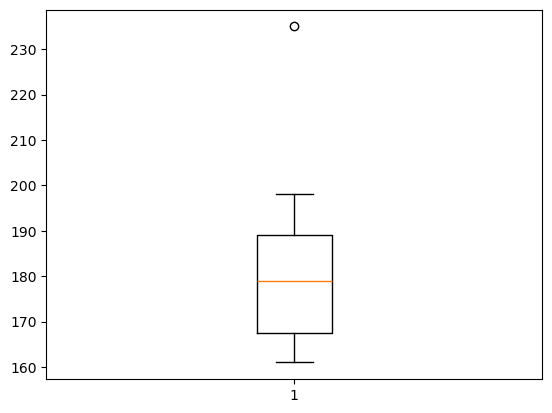

In [41]:
# Adding an outlier to the data:
plt.boxplot(np.append(x, [235]))
plt.show()

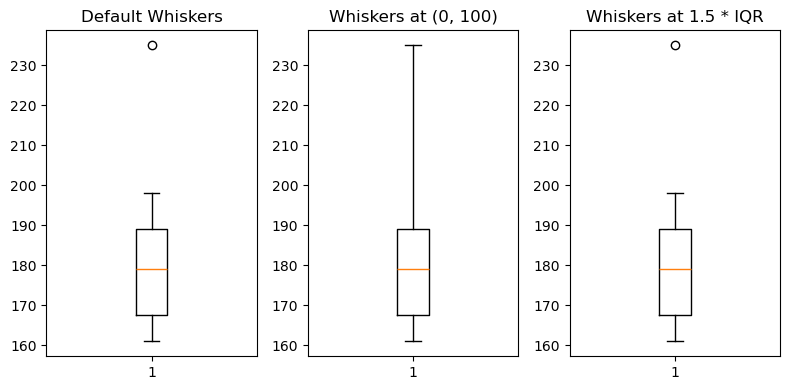

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4))

# Boxplot with one extreme value appended
ax1.boxplot(np.append(x, [235]))
ax1.set_title('Default Whiskers')

# Boxplot with whiskers at min and max of the data (0th and 100th percentiles)
ax2.boxplot(np.append(x, [235]), whis=(0, 100))
ax2.set_title('Whiskers at (0, 100)')

# Boxplot with whiskers set to 1.5 * IQR
ax3.boxplot(np.append(x, [235]), whis=1.5)
ax3.set_title('Whiskers at 1.5 * IQR')

plt.tight_layout()
plt.show()

### Working with data - dataframes

In [43]:
# import the Pandas library
import pandas as pd 

**About the Code**:  
  - Use `pd.DataFrame()` from **pandas** to create a table-like data structure.  
  - The dictionary keys (`'males'` and `'females'`) become the DataFrame columns, and the lists are the row entries.  
  - Missing values (`np.nan`) allow pandas to handle incomplete data gracefully in further analysis.

In [44]:
# Make a DataFrame:
data = pd.DataFrame({
    'males':  [152, 171, 173, 173, 178, 179, 180, 180, 182, 182, 182, 185, 
                    185 ,185, 185, 185 ,186 ,187 ,190 ,190, 192, 192, 197], 
    'females':[159, 166, 168 ,168 ,171 ,171 ,172, 172, 173, 174 ,175 ,175,
                    175, 175, 175, 177, 178, np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
})
data

,males,females
0,152,159.0
1,171,166.0
2,173,168.0
3,173,168.0
4,178,171.0
5,179,171.0
6,180,172.0
7,180,172.0
8,182,173.0
9,182,174.0


In [45]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


<Axes: >

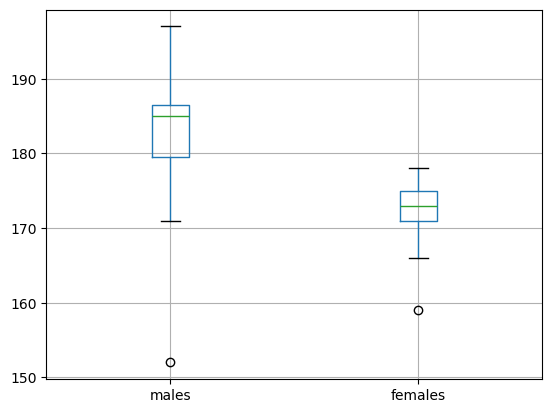

In [46]:
# The DataFrame has a direct method for making a boxplot:
data.boxplot()

### Reading data from an external file

It is very important to learn how to read data from other files. In practice one will never type all the data into Python by hand!

In [47]:
csv_data= pd.read_csv("studentheights.csv", sep=';')

In [48]:
print(type(csv_data))

<class 'pandas.core.frame.DataFrame'>


In [50]:
csv_data.head()

,Height,Gender
0,152,male
1,171,male
2,173,male
3,173,male
4,178,male


Notice that this DataFrame is differently structured compared to the one from above (which had columns: "males" and "females").

If we want to do a boxplot by gender, we need to include the "by=.." argument:

<Axes: title={'center': 'Height'}, xlabel='[Gender]'>

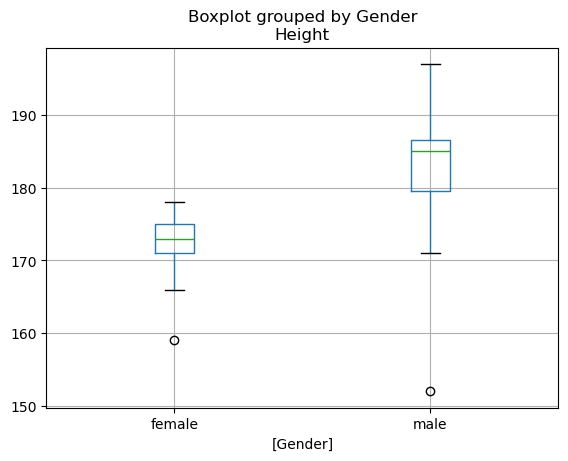

In [51]:
csv_data.boxplot(by='Gender')

## Pie Chart

For the CSV file data on students' Gender, make a pie chart.

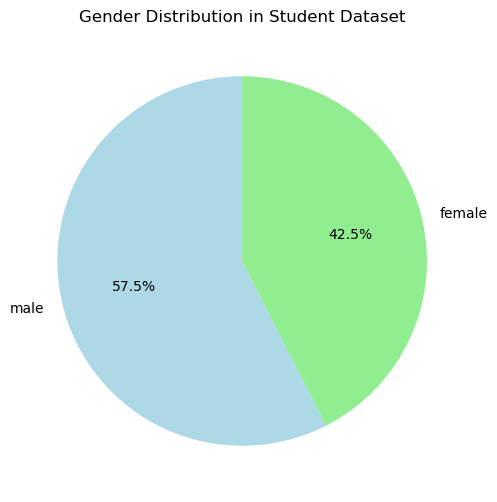

In [52]:
# import pandas as pd
# Reload the CSV with the correct delimiter
data = pd.read_csv("studentheights.csv", delimiter=';')

# Count the occurrences of each gender
gender_counts = data['Gender'].value_counts()

# Plot a pie chart of gender distribution
# import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Gender Distribution in Student Dataset')
plt.show()


See the book for more plots (scatterplots, pie charts etc.)